In [1]:
import findspark
findspark.init()
from pyspark import SparkContext

#sc.stop()
sc = SparkContext(master="local[6]",pyFiles=['lib/spark_PCA.py'])

from pyspark.sql import *
sqlContext = SQLContext(sc)

%pylab inline
import sys
sys.path.append('./lib')

import numpy as np
from spark_PCA import computeCov


Populating the interactive namespace from numpy and matplotlib


In [2]:
df=sqlContext.read.csv('SP500.csv',header='true',inferSchema='true')
df.count()

13422

In [3]:
columns=df.columns
col=[c for c in columns if '_P' in c]
tickers=[a[:-2] for a in col]
tickers[:10],len(tickers)

(['AGN', 'EOG', 'WLP', 'CPB', 'YUM', 'JWN', 'TAP', 'BWA', 'WM', 'SPG'], 481)

In [10]:
L=df.select('AGN_P').collect()
L=[x.AGN_P for x in L if not x.AGN_P is None]
L[:10]

[5.49522178458,
 5.23915577977,
 5.32526647165,
 5.38191824263,
 5.43857001361,
 5.23915577977,
 5.18477007964,
 5.15531115873,
 5.15531115873,
 5.15531115873]

In [11]:
len(L)

6470

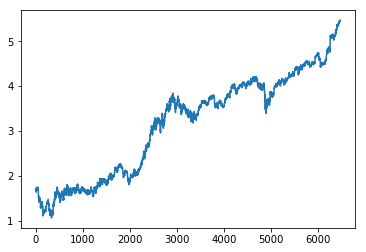

In [12]:
#%pylab inline 
LL=log(L)
plot(LL)

In [13]:
def calc_splitpoints(R,count):
    return arange(R[0],R[1],(R[1]-R[0])/(count*1.00001))
def Box_count(LL):
    X_range=[0,len(LL)]
    Y_range=[min(LL),max(LL)]
    Y_range,X_range

    max_exp=12
    N=np.zeros([max_exp,2])
    for E in range(max_exp):
        count=2**E
        X=[int(x) for x in calc_splitpoints(X_range,count)]
        Ystep=(Y_range[1]-Y_range[0])/count

        T=np.zeros(count)
        for i in range(count):
            xmin,xmax=X[i:i+2]
            S=LL[xmin:xmax]
            T[i]=int(max(S)/Ystep)+1-int(min(S)/Ystep)
        N[E,:]=[count,sum(T)]
    dim=(log(N[-1,1])-log(N[4,1]))/(log(N[-1,0])-log(N[4,0]))
    print 'dim=',dim
    plot(log(N[:,0]),log(N[:,1]));
    xlabel('log 1/epsilon')
    ylabel('log N');
    grid()
    return N,dim

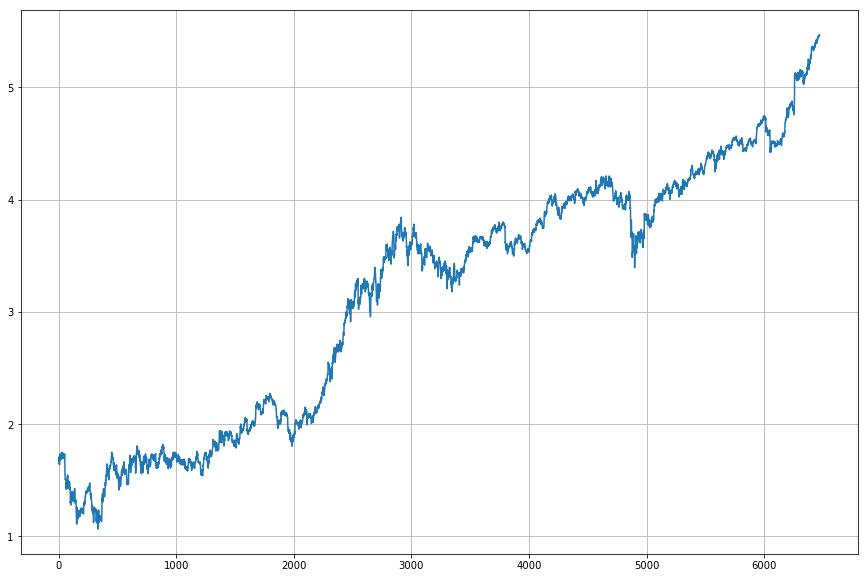

In [15]:
figure(figsize=(15,10))
LL=log(L)
plot(LL)
grid()
#plot(LL[8000:8500])

dim= 1.29882872846


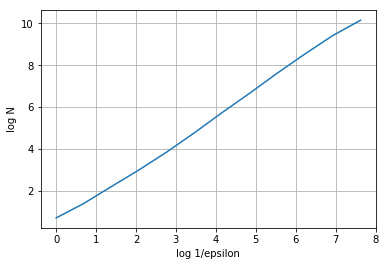

In [16]:
N,dim=Box_count(LL)

In [17]:
x=arange(-1,1,0.0001)
y=sin(8*x)

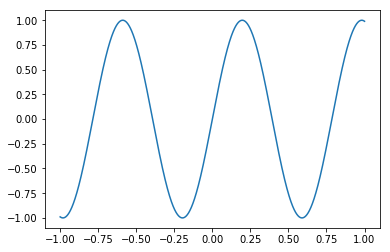

In [18]:
plot(x,y)

dim= 1.00206248332


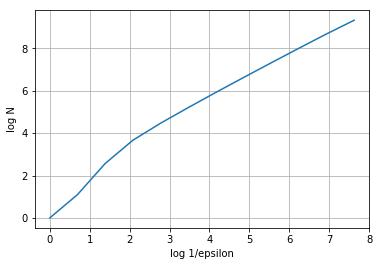

In [19]:
N,dim=Box_count(y)

array([  1.,  10.,   1.,  10.,   1.,  10.,   1.,  10.,   1.,  10.])

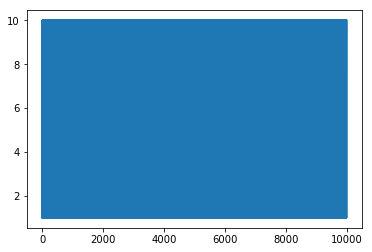

In [20]:
LL=np.array([1.,10.]*5000)
plot(LL)
LL[:10]

dim= 1.98760591825


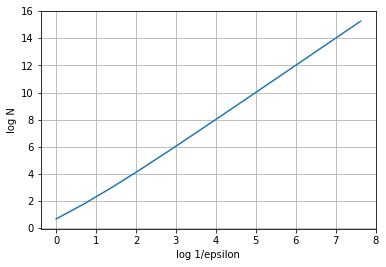

In [21]:
N,dim=Box_count(LL)